## Import Libraries

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Loaded all libraries for perfrom task

## Load CSV file and Display the records

In [50]:
df = pd.read_csv("patient_health_records_1000.csv")
df

,patient_id,age,gender,region,bmi,blood_pressure,cholesterol,glucose,disease_risk
0,P1,55.0,Female,NaN,26.040968,114.816318,177.585944,NaN,0
1,P2,30.0,Male,North,25.222928,128.868150,210.940921,NaN,1
2,P3,NaN,Female,East,24.264428,121.686673,203.972083,135.503815,0
3,P4,23.0,Male,NaN,18.946459,120.404668,232.498633,105.851006,1
4,P5,82.0,Female,South,25.893533,107.000716,142.655301,354.688152,1
...,...,...,...,...,...,...,...,...,...
995,P996,85.0,Female,West,NaN,102.649325,166.335206,144.288015,0
996,P997,64.0,Female,North,25.346513,158.383876,160.379621,112.667422,1
997,P998,38.0,Male,East,30.813331,110.992750,202.877853,144.220297,0
998,P999,84.0,Male,East,21.154458,113.958515,209.868959,145.836600,1


read csv file with using read_csv() file and display all the 1000 records

## Numerical Column

In [51]:
Numerical_column = df.select_dtypes(include=["int64","float64"])
print(Numerical_column)

      age        bmi  blood_pressure  cholesterol     glucose  disease_risk
0    55.0  26.040968      114.816318   177.585944         NaN             0
1    30.0  25.222928      128.868150   210.940921         NaN             1
2     NaN  24.264428      121.686673   203.972083  135.503815             0
3    23.0  18.946459      120.404668   232.498633  105.851006             1
4    82.0  25.893533      107.000716   142.655301  354.688152             1
..    ...        ...             ...          ...         ...           ...
995  85.0        NaN      102.649325   166.335206  144.288015             0
996  64.0  25.346513      158.383876   160.379621  112.667422             1
997  38.0  30.813331      110.992750   202.877853  144.220297             0
998  84.0  21.154458      113.958515   209.868959  145.836600             1
999   NaN  24.131473      110.004502   253.128865   68.504790             0

[1000 rows x 6 columns]


Displays all the numerical column

## Categorical column

In [52]:
category_column = df.select_dtypes(include=["object"])
print(category_column)

    patient_id  gender region
0           P1  Female    NaN
1           P2    Male  North
2           P3  Female   East
3           P4    Male    NaN
4           P5  Female  South
..         ...     ...    ...
995       P996  Female   West
996       P997  Female  North
997       P998    Male   East
998       P999    Male   East
999      P1000  Female   West

[1000 rows x 3 columns]


Display all the categorical column

## Basic information

In [53]:
df.head()

,patient_id,age,gender,region,bmi,blood_pressure,cholesterol,glucose,disease_risk
0,P1,55.0,Female,NaN,26.040968,114.816318,177.585944,NaN,0
1,P2,30.0,Male,North,25.222928,128.868150,210.940921,NaN,1
2,P3,NaN,Female,East,24.264428,121.686673,203.972083,135.503815,0
3,P4,23.0,Male,NaN,18.946459,120.404668,232.498633,105.851006,1
4,P5,82.0,Female,South,25.893533,107.000716,142.655301,354.688152,1


Display first five records with using head

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      1000 non-null   object 
 1   age             920 non-null    float64
 2   gender          920 non-null    object 
 3   region          920 non-null    object 
 4   bmi             922 non-null    float64
 5   blood_pressure  1000 non-null   float64
 6   cholesterol     921 non-null    float64
 7   glucose         922 non-null    float64
 8   disease_risk    1000 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 70.4+ KB


show all the basic information columnname,null value,data types from 1000 records

In [55]:
df.describe()

,age,bmi,blood_pressure,cholesterol,glucose,disease_risk
count,920.000000,922.000000,1000.000000,921.000000,922.000000,1000.000000
mean,53.281522,25.055431,122.545625,201.280735,106.720035,0.461000
std,20.511895,4.752877,22.391544,35.463734,45.344302,0.498726
min,18.000000,5.123731,75.451588,76.360651,16.386860,0.000000
25%,36.000000,22.090795,110.069544,178.896298,84.425299,0.000000
50%,52.000000,24.909913,120.241575,201.550212,101.158390,0.000000
75%,70.250000,27.619047,131.440369,221.210601,119.535036,1.000000
max,89.000000,59.929535,279.553200,394.631955,482.798540,1.000000


Gives the all the aggegate function like count,max,min,std and five number of summary for each indivisuals columns

In [56]:
df.shape

(1000, 9)

my records has 1000 rows and 9 columns

## Identify Missing Values + Percentage Report

In [57]:
missing_value = pd.DataFrame({
    "Missing_Count": df.isnull().sum(),
    "Missing_Percentage": (df.isnull().sum()/len(df))*100
})

missing_value


,Missing_Count,Missing_Percentage
patient_id,0,0.0
age,80,8.0
gender,80,8.0
region,80,8.0
bmi,78,7.8
blood_pressure,0,0.0
cholesterol,79,7.9
glucose,78,7.8
disease_risk,0,0.0


findings null value count and percentage

## SIMPLE IMPUTER (Numerical : BMI Mean and Median)

In [58]:
df_mean = df.copy()
df_median = df.copy()

mean_imputer = SimpleImputer(strategy="mean")
median_imputer = SimpleImputer(strategy="median")

df_mean[["bmi"]] = mean_imputer.fit_transform(df_mean[["bmi"]])
df_median[["bmi"]] = median_imputer.fit_transform(df_median[["bmi"]])


filling bmi column null value with mean and median with using sklearn

## SIMPLE IMPUTER (Categorical : Region Most Frequent)

In [59]:
cat_imputer = SimpleImputer(strategy="most_frequent")

df_mean[["region"]] = cat_imputer.fit_transform(df_mean[["region"]])
df_median[["region"]] = cat_imputer.fit_transform(df_median[["region"]])


filling region column null value with most frequent with using sklearn

## MOST FREQUENT IMPUTATION (Gender)

In [60]:
df_mean[["gender"]] = cat_imputer.fit_transform(df_mean[["gender"]])
df_median[["gender"]] = cat_imputer.fit_transform(df_median[["gender"]])


filling gender column null value with most frequent with using sklearn

## MISSING INDICATOR + RANDOM SAMPLE IMPUTATION

In [93]:
df_random = df.copy()

cols = ["age","bmi","cholesterol","glucose"]

for col in cols:
    # Create missing indicator column
    df_random[col + "_missing"] = df_random[col].isnull().astype(int)
    
    # Take random values from existing data
    samples = df_random[col].dropna().sample(
        df_random[col].isnull().sum(),
        replace=True
    )
    
    # Fill missing values
    df_random.loc[df_random[col].isnull(), col] = samples.values


## KNN IMPUTER (Multivariate)

In [94]:
knn_df = df.copy()

num_cols = ["age","bmi","blood_pressure","cholesterol","glucose"]

knn = KNNImputer(n_neighbors=5)
knn_df[num_cols] = knn.fit_transform(knn_df[num_cols])


## MICE (Iterative Imputer)

In [95]:
mice_df = df.copy()

mice = IterativeImputer(max_iter=10, random_state=42)
mice_df[num_cols] = mice.fit_transform(mice_df[num_cols])


## Compare Missing Values After Each Method

In [64]:
comparison = pd.DataFrame({
    "Original": df.isnull().sum(),
    "Mean/Median": df_median.isnull().sum(),
    "Random": df_random.isnull().sum(),
    "KNN": knn_df.isnull().sum(),
    "MICE": mice_df.isnull().sum()
})

comparison


,Original,Mean/Median,Random,KNN,MICE
age,80.0,80.0,0,0.0,0.0
age_missing,NaN,NaN,0,NaN,NaN
blood_pressure,0.0,0.0,0,0.0,0.0
bmi,78.0,0.0,0,0.0,0.0
bmi_missing,NaN,NaN,0,NaN,NaN
cholesterol,79.0,79.0,0,0.0,0.0
cholesterol_missing,NaN,NaN,0,NaN,NaN
disease_risk,0.0,0.0,0,0.0,0.0
gender,80.0,0.0,80,80.0,80.0
glucose,78.0,78.0,0,0.0,0.0


In [65]:
mice_df["gender"] = mice_df["gender"].fillna(df["gender"].mode()[0])
mice_df["region"] = mice_df["region"].fillna(df["region"].mode()[0])


In [66]:
final_df = mice_df.copy()
final_df.isnull().sum()


patient_id        0
age               0
gender            0
region            0
bmi               0
blood_pressure    0
cholesterol       0
glucose           0
disease_risk      0
dtype: int64

In [67]:

# Save back to CSV without index
df.to_csv("filled_dataset.csv", index=False)

df.head()


,patient_id,age,gender,region,bmi,blood_pressure,cholesterol,glucose,disease_risk
0,P1,55.0,Female,NaN,26.040968,114.816318,177.585944,NaN,0
1,P2,30.0,Male,North,25.222928,128.868150,210.940921,NaN,1
2,P3,NaN,Female,East,24.264428,121.686673,203.972083,135.503815,0
3,P4,23.0,Male,NaN,18.946459,120.404668,232.498633,105.851006,1
4,P5,82.0,Female,South,25.893533,107.000716,142.655301,354.688152,1


## Load Cleaned (Imputed) Dataset

In [68]:
final_df.head()

,patient_id,age,gender,region,bmi,blood_pressure,cholesterol,glucose,disease_risk
0,P1,55.000000,Female,North,26.040968,114.816318,177.585944,106.757135,0
1,P2,30.000000,Male,North,25.222928,128.868150,210.940921,106.706370,1
2,P3,53.267844,Female,East,24.264428,121.686673,203.972083,135.503815,0
3,P4,23.000000,Male,North,18.946459,120.404668,232.498633,105.851006,1
4,P5,82.000000,Female,South,25.893533,107.000716,142.655301,354.688152,1


## Dataset Shape & Summary BEFORE Outlier Treatment

In [69]:
print("Shape Before:", final_df.shape)
final_df.describe()


Shape Before: (1000, 9)


,age,bmi,blood_pressure,cholesterol,glucose,disease_risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.281083,25.055805,122.545625,201.280990,106.719587,0.461000
std,19.673464,4.563563,22.391544,34.032639,43.538139,0.498726
min,18.000000,5.123731,75.451588,76.360651,16.386860,0.000000
25%,38.000000,22.325704,110.069544,181.276719,85.380560,0.000000
50%,53.266850,25.054489,120.241575,201.285101,103.975762,0.000000
75%,69.000000,27.314821,131.440369,220.070489,117.554239,1.000000
max,89.000000,59.929535,279.553200,394.631955,482.798540,1.000000


## Z-Score Method

In [70]:

z_scores = np.abs(stats.zscore(final_df[["cholesterol","glucose"]]))
outliers = (z_scores > 3).any(axis=1)

print("Total Z-score outliers:", outliers.sum())


Total Z-score outliers: 32


## Remove Z-Score Outliers

In [71]:
df_z = final_df[~outliers]
print("Shape Before:", final_df.shape)
print("Shape After Z-score:", df_z.shape)


Shape Before: (1000, 9)
Shape After Z-score: (968, 9)


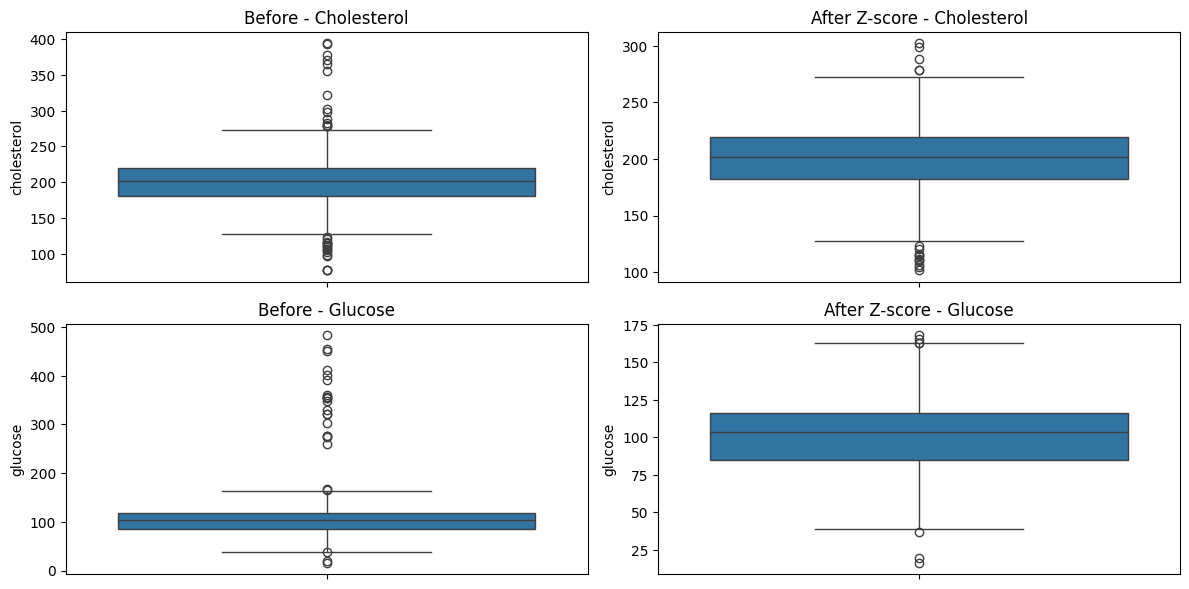

In [72]:

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.boxplot(y=final_df["cholesterol"])
plt.title("Before - Cholesterol")

plt.subplot(2,2,2)
sns.boxplot(y=df_z["cholesterol"])
plt.title("After Z-score - Cholesterol")

plt.subplot(2,2,3)
sns.boxplot(y=final_df["glucose"])
plt.title("Before - Glucose")

plt.subplot(2,2,4)
sns.boxplot(y=df_z["glucose"])
plt.title("After Z-score - Glucose")

plt.tight_layout()
plt.show()


in cholesterol,before apply z - score we can see more outliers but after apply z - score some of outliers are removes.In glucose,after apply z - score much of the outliers are removes.in the end the remaining outliers are removed with IQR and Winsorization.

## Columns We Analyze

In [73]:
cols = ["bmi", "cholesterol", "glucose"]


consided all the numerical column for IQR and Winsorization for outliers treatment

## BEFORE Outlier Treatment (Original Data)

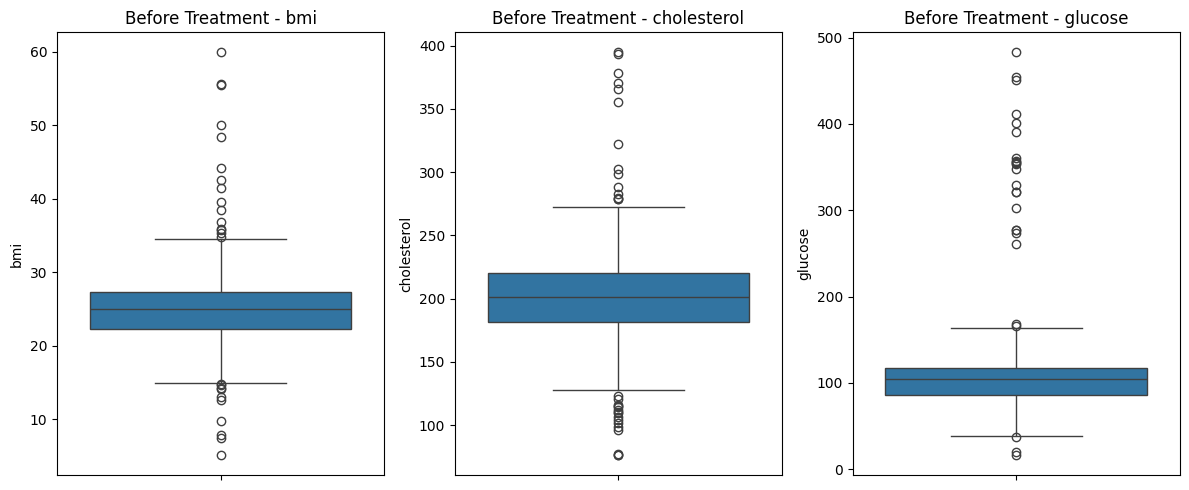

In [74]:
plt.figure(figsize=(12,5))
for i, col in enumerate(cols,1):
    plt.subplot(1,3,i)
    sns.boxplot(y=final_df[col])
    plt.title(f"Before Treatment - {col}")

plt.tight_layout()
plt.show()


Before applying the IQR method,we can see some outliers in all the 3 numerical column(bmi,cholesterol,glucose).

## IQR Method (BMI)

In [75]:

for col in cols:
    Q1 = df_z[col].quantile(0.25)
    Q3 = df_z[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    iqr_outliers = (df_z[col] < lower) | (df_z[col] > upper)

    print(f"{col.upper()} IQR Outliers:", iqr_outliers.sum())


BMI IQR Outliers: 23
CHOLESTEROL IQR Outliers: 16
GLUCOSE IQR Outliers: 7


with using IQR methods,we can identified the outliers that have less value from Q1 and more value than Q3.so we can identified the outliers.

## Remove BMI IQR Outliers

In [76]:
for col in cols:
    Q1 = df_z[col].quantile(0.25)
    Q3 = df_z[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_z = df_z[(df_z[col] >= lower) & (df_z[col] <= upper)]


make our dataset frame between the lower and upper

In [77]:
print("Shape After IQR:", df_z.shape)


Shape After IQR: (924, 9)


removes all the outliers

## AFTER IQR Method

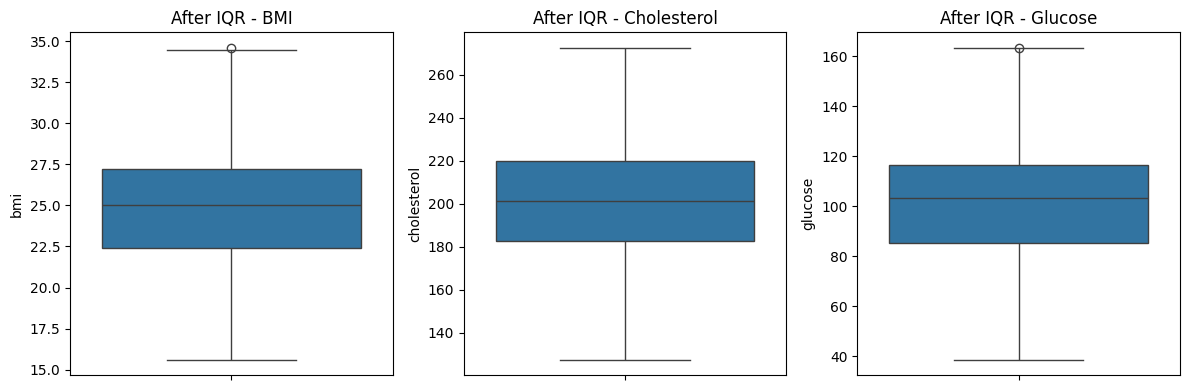

In [78]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.boxplot(y=df_z["bmi"])
plt.title("After IQR - BMI")

plt.subplot(1,3,2)
sns.boxplot(y=df_z["cholesterol"])
plt.title("After IQR - Cholesterol")

plt.subplot(1,3,3)
sns.boxplot(y=df_z["glucose"])
plt.title("After IQR - Glucose")

plt.tight_layout()
plt.show()

first in cholesterol,we can not found any outliers the value is much like but in bmiand glucode one outliers remain after IQR method.bot 1-1 outliers removes from both column removes with winsorization.

## Create Copy for Winsorization

In [79]:
df_winsor = df_z.copy()


making the copy of our dataset for winsorization perfroming.

## Apply Winsorization (5% – 95%)

In [80]:
cols = ["bmi","cholesterol","glucose"]

for col in cols:
    lower = df_winsor[col].quantile(0.05)
    upper = df_winsor[col].quantile(0.95)
    
    df_winsor[col] = np.clip(df_winsor[col], lower, upper)

applying the winsorization

## BEFORE Winsorization Graphs

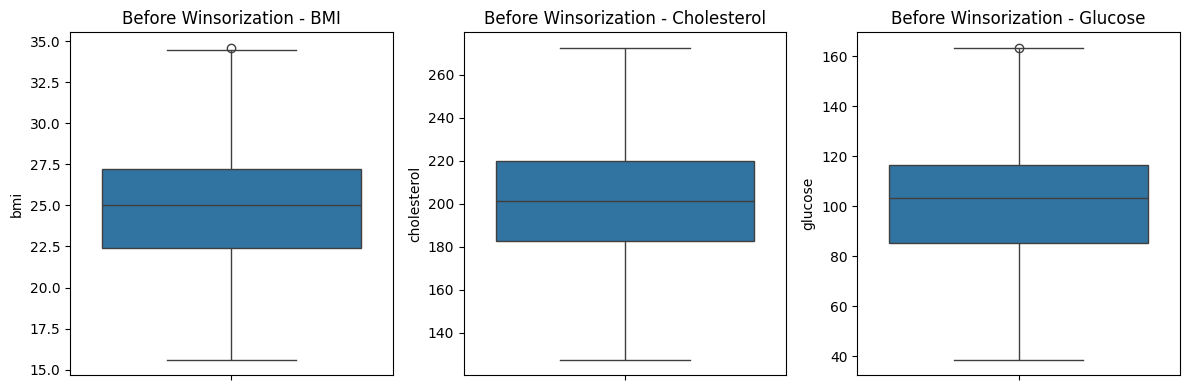

In [81]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.boxplot(y=df_z["bmi"])
plt.title("Before Winsorization - BMI")

plt.subplot(1,3,2)
sns.boxplot(y=df_z["cholesterol"])
plt.title("Before Winsorization - Cholesterol")

plt.subplot(1,3,3)
sns.boxplot(y=df_z["glucose"])
plt.title("Before Winsorization - Glucose")

plt.tight_layout()
plt.show()

same as IQR method before the winsorization

## AFTER Winsorization Graphs

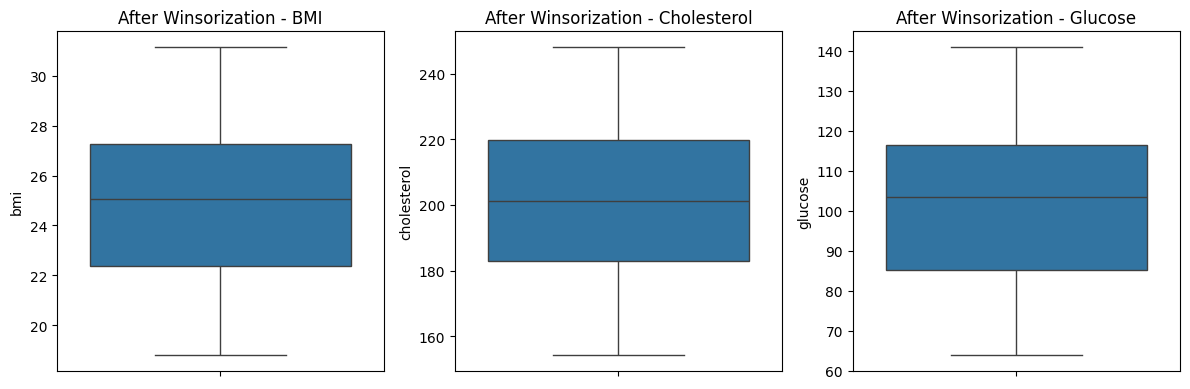

In [82]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.boxplot(y=df_winsor["bmi"])
plt.title("After Winsorization - BMI")

plt.subplot(1,3,2)
sns.boxplot(y=df_winsor["cholesterol"])
plt.title("After Winsorization - Cholesterol")

plt.subplot(1,3,3)
sns.boxplot(y=df_winsor["glucose"])
plt.title("After Winsorization - Glucose")

plt.tight_layout()
plt.show()


after applying the winsorization,all the column has free from the outliers and much all the column remoes the outliers.

## Save Cleaned Dataset

In [83]:
df_winsor.to_csv("final_cleaned_dataset.csv", index=False)


cleanded dataset and saved

## UNIVARIATE ANALYSIS (Single Variable)

## Graph 1 – Age Distribution

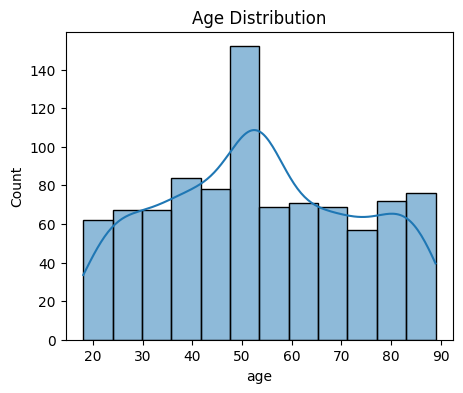

In [84]:
plt.figure(figsize=(5,4))
sns.histplot(df_winsor["age"], kde=True)
plt.title("Age Distribution")
plt.show()


## Graph 2 – BMI Distribution

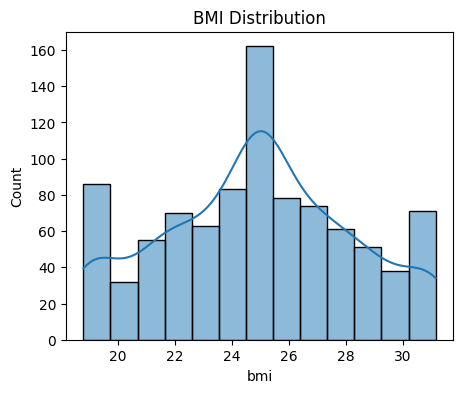

In [85]:
plt.figure(figsize=(5,4))
sns.histplot(df_winsor["bmi"], kde=True)
plt.title("BMI Distribution")
plt.show()


## Cholesterol Distribution

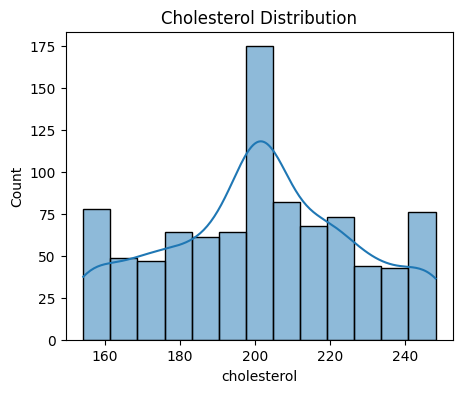

In [86]:
plt.figure(figsize=(5,4))
sns.histplot(df_winsor["cholesterol"], kde=True)
plt.title("Cholesterol Distribution")
plt.show()

## BIVARIATE ANALYSIS (Two Variables)

## Graph 1 – Age vs BMI

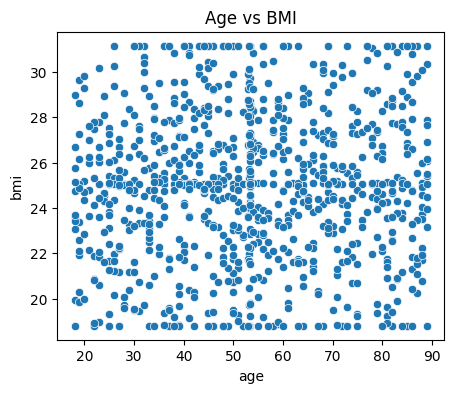

In [87]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=df_winsor["age"], y=df_winsor["bmi"])
plt.title("Age vs BMI")
plt.show()


## Graph 2 – Age vs Cholesterol

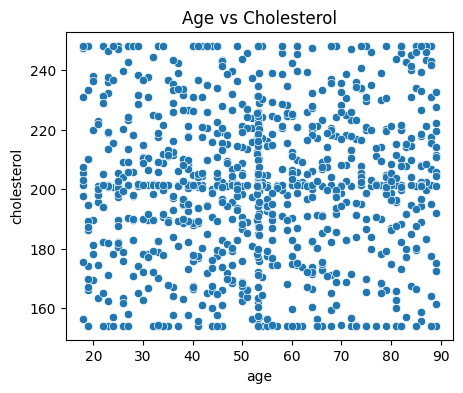

In [88]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=df_winsor["age"], y=df_winsor["cholesterol"])
plt.title("Age vs Cholesterol")
plt.show()


## Graph 3 – BMI vs Glucose

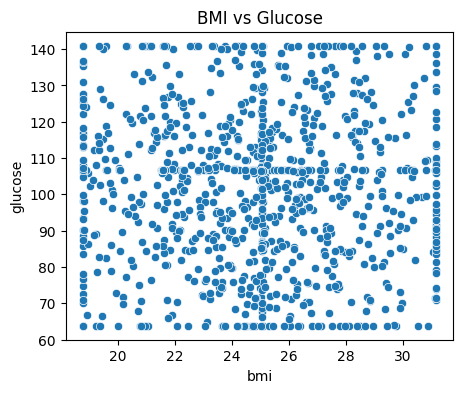

In [89]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=df_winsor["bmi"], y=df_winsor["glucose"])
plt.title("BMI vs Glucose")
plt.show()


## MULTIVARIATE ANALYSIS (More Than Two Variables)

## Graph 1 – Correlation Heatmap

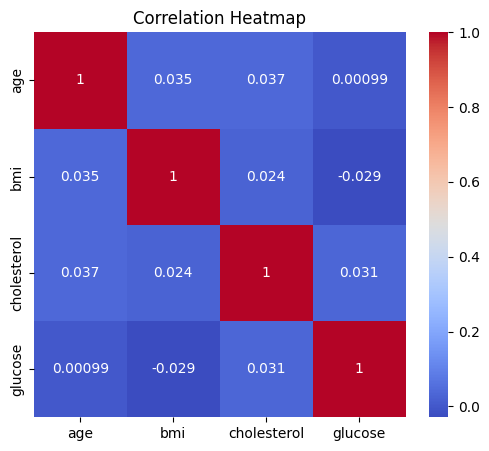

In [90]:
plt.figure(figsize=(6,5))
sns.heatmap(df_winsor[["age","bmi","cholesterol","glucose"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Graph 2 – Pair Plot

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Pair Plot - Part 1


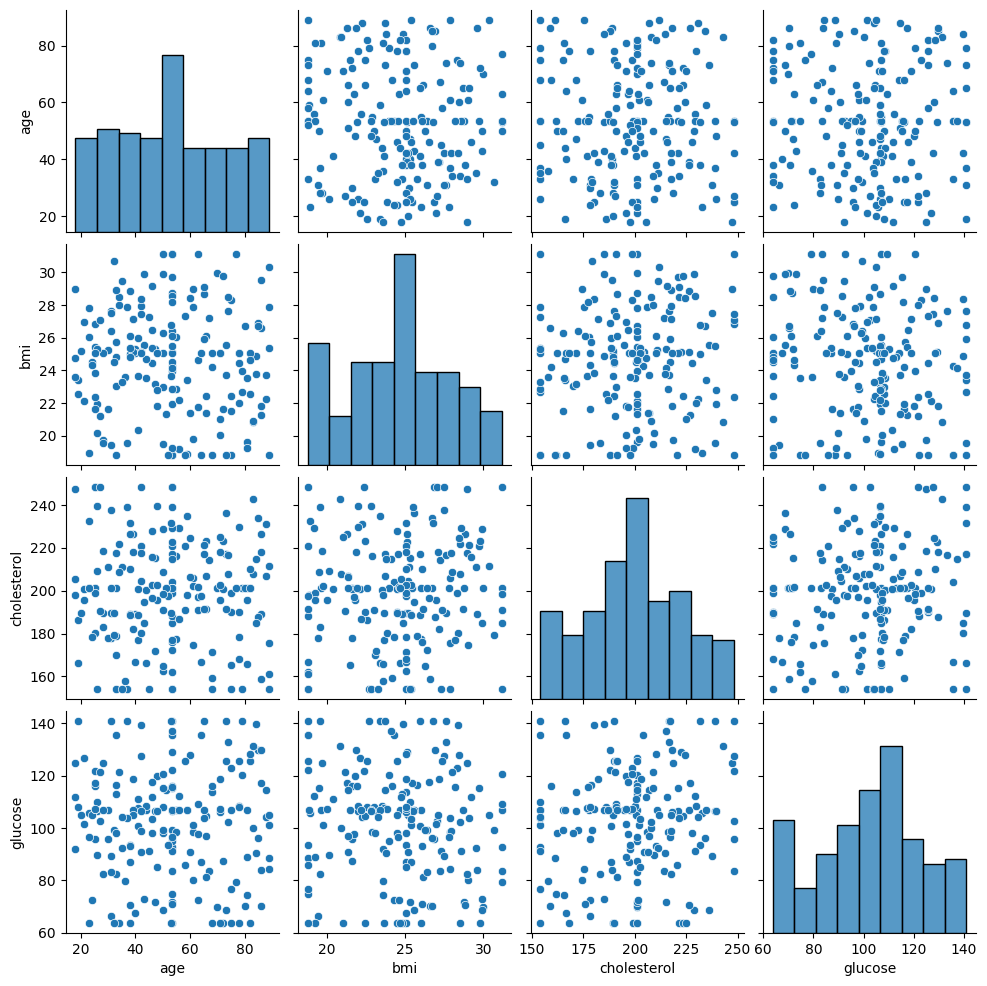

Pair Plot - Part 2


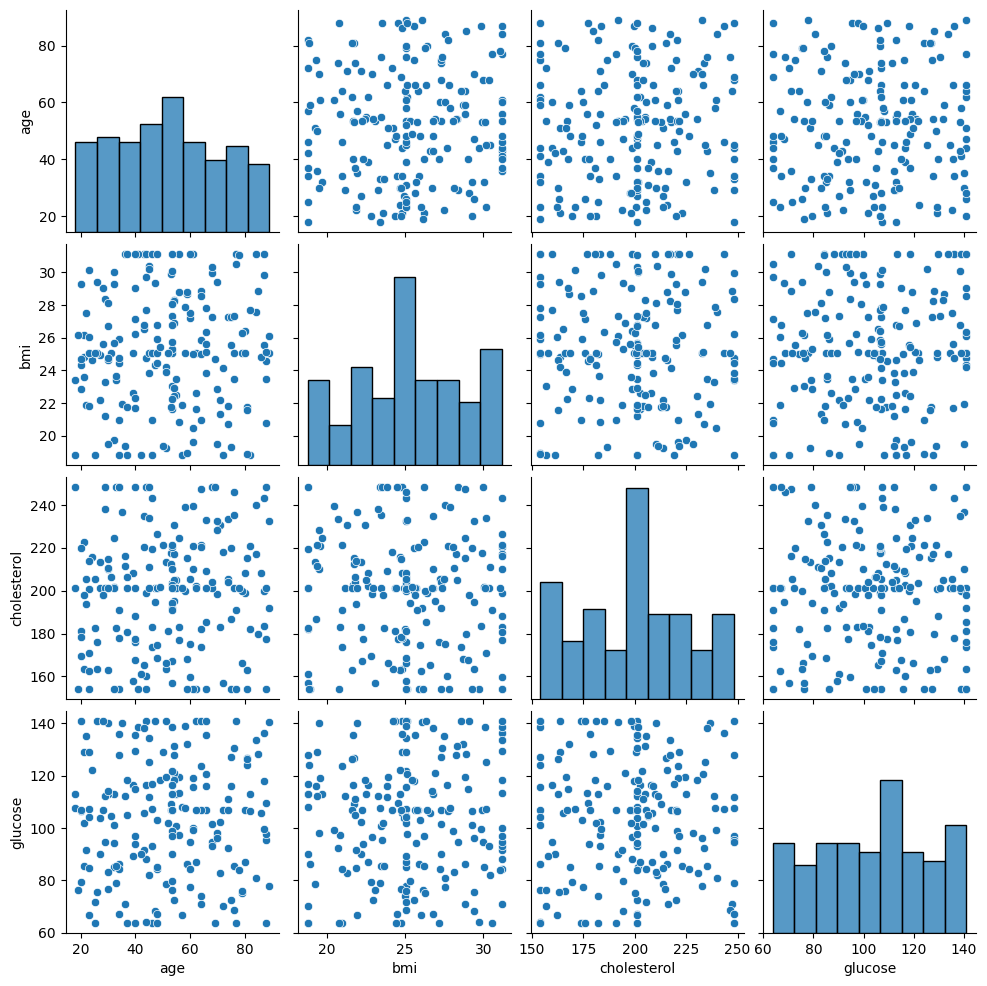

Pair Plot - Part 3


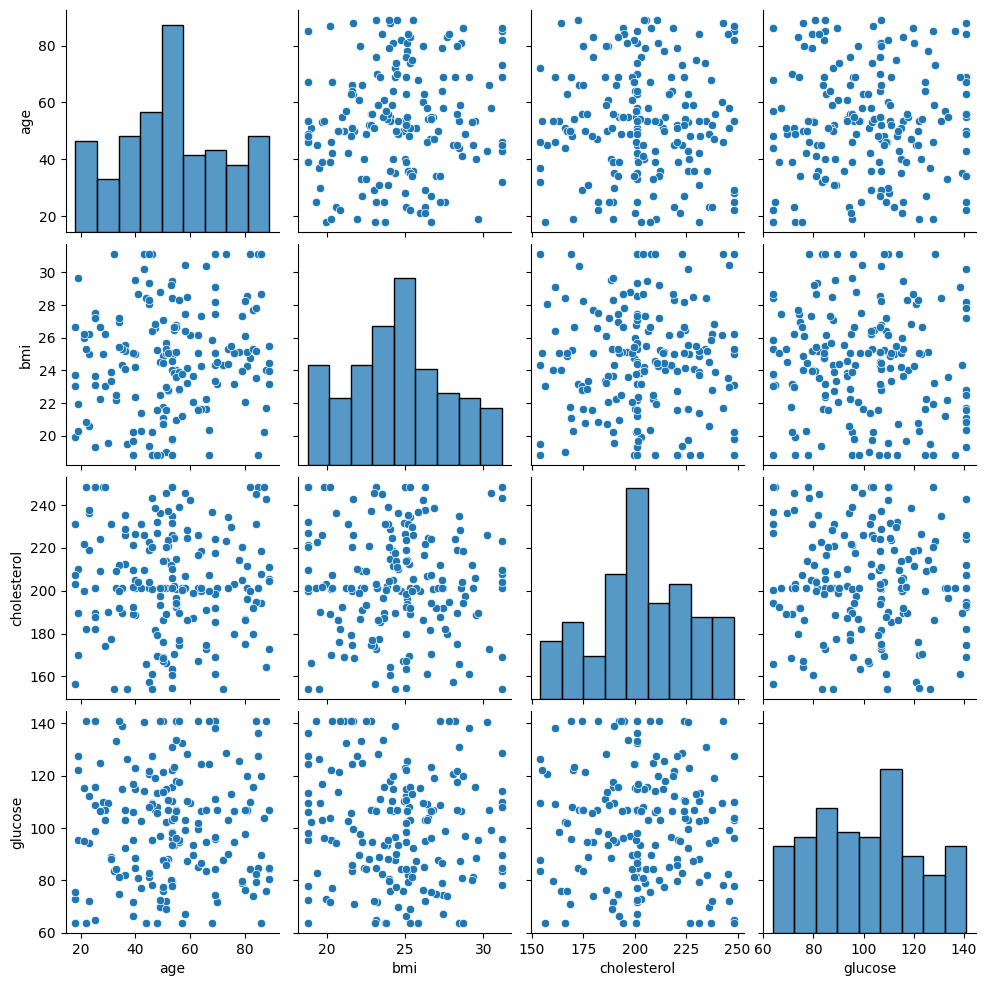

Pair Plot - Part 4


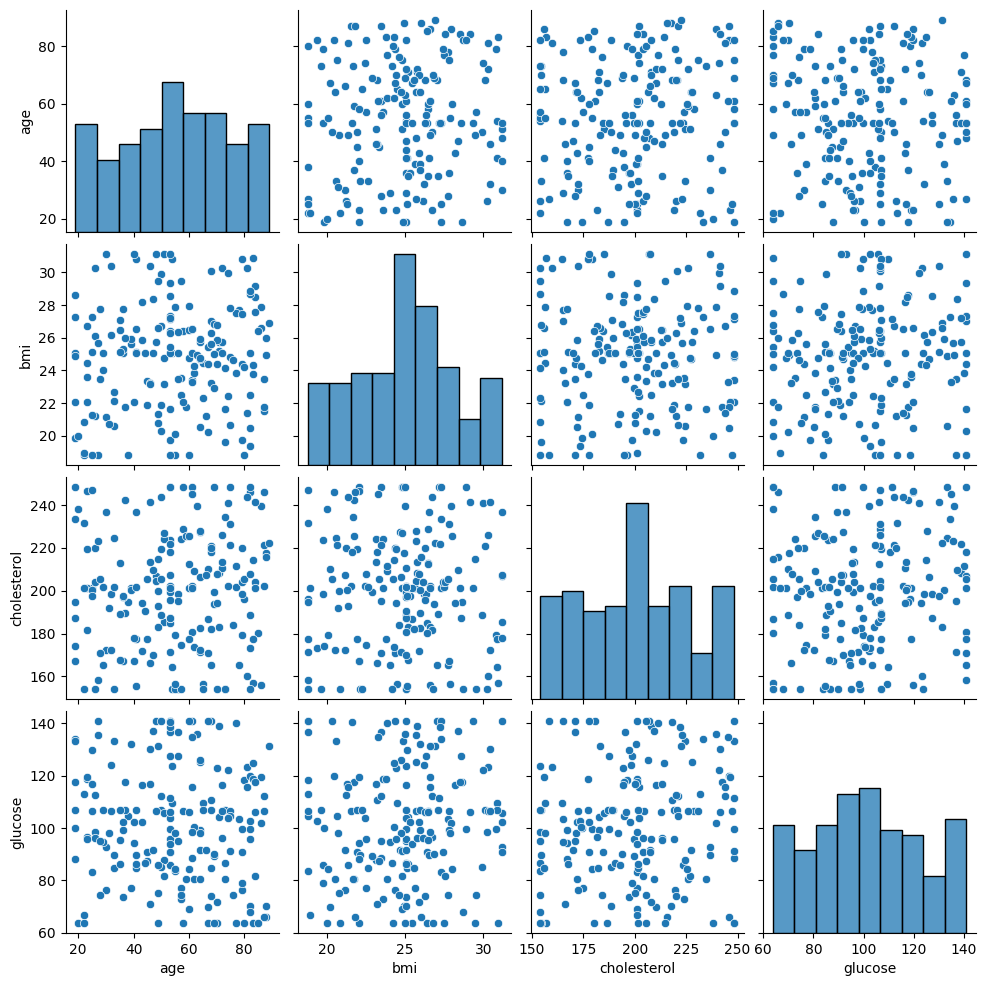

Pair Plot - Part 5


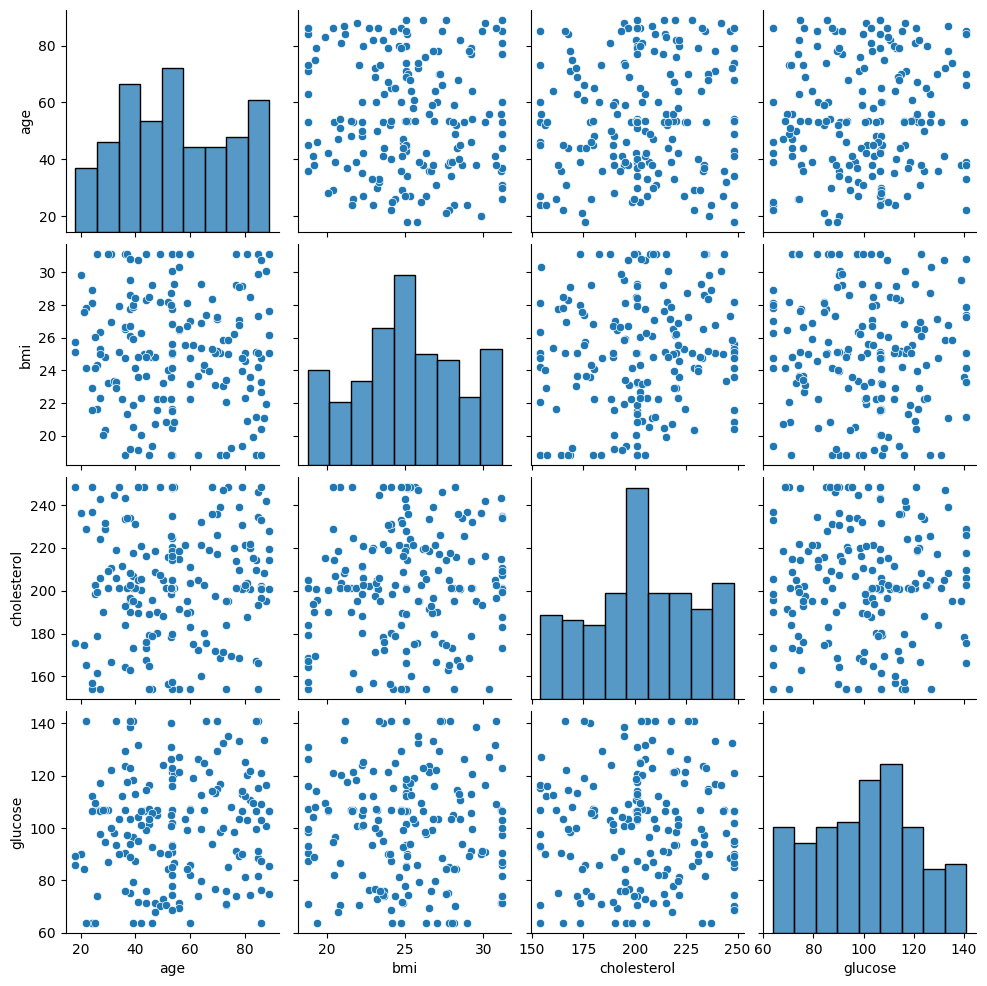

In [91]:


# Select columns
cols = ["age","bmi","cholesterol","glucose"]

# Split dataset into 5 equal parts
splits = np.array_split(df_winsor[cols], 5)

# Draw pairplot for each split
for i in range(5):
    print(f"Pair Plot - Part {i+1}")
    sns.pairplot(splits[i])
    plt.show()

## Graph 3 – BMI vs Glucose by Gender

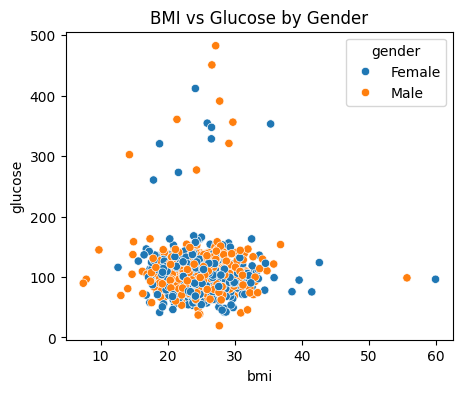

In [92]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=df["bmi"], y=df["glucose"], hue=df["gender"])
plt.title("BMI vs Glucose by Gender")
plt.show()
